# Collaboration and Competition

---

This report shows the results of training two agents to solve the Tennis environment using the Deep Deterministic Policy Gradient algorithm. 

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

Import the necessary libraries.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

from collections import deque
import torch
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import AgentParallel
from train import train

Load the environment.

In [3]:
#insert the correct path
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Set a random seed to make experiments reproducible.

In [5]:
seed = 0

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


In [7]:
# function to plot the scores
def plot_scores(scores, plot_title = ""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.title(plot_title)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

## Train the agents

To train the agents, we use the DDPG algorithm. In DDPG, the agent uses two networks: the critic and the actor network.

The critic learns the state value function $s -> V(s)$. The actor maps states to actions and learns which action to take in which state according to the optimal policy.

For both nets, the input layer size corresponds to the state size. We use a net with two hidden layers, each consisting of 128 nodes and a final output layer
In the critic net, the output layer consists of a single node corresponding to the approximated state value.
In the actor net, the output layer size corresponds to the number of parameters needed to specify an action. The output defines the best action to take in the given state according to the current policy.

The agents need to collaborate to successfully play tennis in the environment. We use the same nets for both agents. Each agent has its own observation of the state, learns the state value using the critic net, chooses an action based on the state observation using the actor net, and receives a reward. The experiences of both agents are added to the same replay buffer and used for training the critic and actor networks.

To evaluate the performance, we sum up the rewards over each episode for each of the two agents without discounting.
We then take the maximum of these two returns.
The environment is solved one the average over 100 episodes of this maximum return is larger than 0.5.

We use the following parameters for training:

* BUFFER_SIZE = int(1e5)     (replay buffer size)
* BATCH_SIZE = 256           (minibatch size)
* GAMMA = 1                  (discount factor)
* TAU = 1e-3                 (for soft update of target parameters)
* LR_ACTOR = 1e-4            (learning rate of the actor)
* LR_CRITIC = 1e-3           (learning rate of the critic)
* WEIGHT_DECAY = 0           (L2 weight decay)

* UPDATE_EVERY = 1          (number of steps between updates)
* NUMBER_UPDATES = 2        (number of gradient updates per update)
* ADD_NOISE = False          (whether to add noise when choosing actions)
* EPSILON = 0.01             (scaling of noise in case ADD_NOISE = True)

With these settings the agent is able to solve the environment within 937 episodes:


In [8]:
agent = AgentParallel(state_size, action_size, num_agents=2, random_seed=seed)

In [9]:
scores = train(agent, env, n_episodes = 1300, max_t = 1000, stop_when_solved=False)

Episode 100	Average Score: 0.03
Episode 200	Average Score: 0.03
Episode 300	Average Score: 0.02
Episode 400	Average Score: 0.04
Episode 500	Average Score: 0.06
Episode 600	Average Score: 0.05
Episode 700	Average Score: 0.09
Episode 800	Average Score: 0.12
Episode 900	Average Score: 0.14
Episode 1000	Average Score: 0.28
Episode 1037 	Score: 2.60
Environment solved in 937 episodes!	Average Score: 0.51
Episode 1100	Average Score: 0.78
Episode 1200	Average Score: 0.42
Episode 1300	Average Score: 1.22


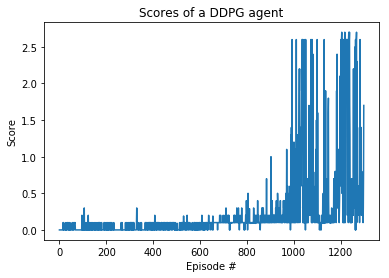

In [10]:
plot_scores(scores, "Scores of a DDPG agent")

When finished, you can close the environment.

In [11]:
env.close()

## Ideas for future work

We trained two agents to collaboratively solve the tennis environment.
They reached an average score of 0.5 over 100 episodes within 937 episodes.

Ideas for further improvements:
* The experiments in this notebook were done with fixed hyperparameter settings. By carrying out a random hyperparameter search, we could determine better hyperparameter settings, leading to more efficient training.
* Try different network architectures
* We could train the agents using other algorithms like PPO or A2C and compare the results

## References


* the code for the DDPG algorithm builds on the implementation in Udacity's DRLND repository (https://github.com/udacity/deep-reinforcement-learning)
* DDPG: https://arxiv.org/abs/1509.02971